# 공항기상관측
데이터링크 : https://data.kma.go.kr/data/air/selectAmosRltmList.do?pgmNo=575

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [4]:
data = pd.read_csv('./공항기상관측.csv',encoding='cp949')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12776 entries, 0 to 12775
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   지점                  12776 non-null  int64  
 1   지점명                 12776 non-null  object 
 2   일시                  12776 non-null  object 
 3   평균풍속(KT)            12776 non-null  float64
 4   최대풍속(KT)            12776 non-null  int64  
 5   최대순간풍속(KT)          12776 non-null  int64  
 6   최대풍속 나타난시각(hhmi)    12776 non-null  int64  
 7   최대순간풍속 나타난시각(hhmi)  12776 non-null  int64  
 8   최대풍속 풍향(deg)        12776 non-null  int64  
 9   최대순간풍속 풍향(deg)      12776 non-null  int64  
 10  최단시정현상              3338 non-null   float64
 11  최고기온(°C)            12776 non-null  float64
 12  최저기온(°C)            12776 non-null  float64
 13  최고기온시각(hhmi)        12776 non-null  int64  
 14  최저기온시각(hhmi)        12776 non-null  int64  
 15  평균해면기압(hPa)         12776 non-null  float64
 16  최고해면

In [6]:
data.isnull().sum()

지점                        0
지점명                       0
일시                        0
평균풍속(KT)                  0
최대풍속(KT)                  0
최대순간풍속(KT)                0
최대풍속 나타난시각(hhmi)          0
최대순간풍속 나타난시각(hhmi)        0
최대풍속 풍향(deg)              0
최대순간풍속 풍향(deg)            0
최단시정현상                 9438
최고기온(°C)                  0
최저기온(°C)                  0
최고기온시각(hhmi)              0
최저기온시각(hhmi)              0
평균해면기압(hPa)               0
최고해면기압(hPa)               0
최저해면기압(hPa)               0
강수량합(mm)               8248
1시간최다강수(mm)            9878
1시간최다강수 시각(hhmi)      10659
30분최다강수(mm)            9880
10분최다강수(mm)            9880
최심신적설(cm)             12597
최심적설(cm)              12561
평균운량(1/8)                 1
5/8이상최저운고(FT)          2413
평균이슬점온도(°C)               0
평균상대습도(%)                 0
기사란                    9039
dtype: int64

In [7]:
data.head()

,지점,지점명,일시,평균풍속(KT),최대풍속(KT),최대순간풍속(KT),최대풍속 나타난시각(hhmi),최대순간풍속 나타난시각(hhmi),최대풍속 풍향(deg),최대순간풍속 풍향(deg),...,1시간최다강수 시각(hhmi),30분최다강수(mm),10분최다강수(mm),최심신적설(cm),최심적설(cm),평균운량(1/8),5/8이상최저운고(FT),평균이슬점온도(°C),평균상대습도(%),기사란
0,92,양양공항,2018-01-01,11.00,20,28,2044,2004,260,260,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,-17.10,25,NaN
1,92,양양공항,2018-01-02,13.20,23,31,906,901,250,250,...,NaN,NaN,NaN,NaN,NaN,2.20,20000.00,-16.60,24,NaN
2,92,양양공항,2018-01-03,8.70,12,15,2158,2153,260,270,...,NaN,NaN,NaN,NaN,NaN,1.20,NaN,-16.70,29,NaN
3,92,양양공항,2018-01-04,5.80,12,16,125,125,270,260,...,NaN,NaN,NaN,NaN,NaN,7.30,2500.00,-10.20,48,NaN
4,92,양양공항,2018-01-05,9.80,17,23,1931,1956,250,250,...,NaN,NaN,NaN,NaN,NaN,4.60,18000.00,-9.90,44,NaN


In [8]:
# drop columns
# '지점', '기사란'

def preprocessing(dataframe):
  df = dataframe.copy()
  col_list = []
  for col in df.columns:
    if '시각' in col:
      col_list.append(col)

  for col in col_list:
    df[col] = df[col].fillna(0)

  df['일시'] = df['일시'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
  df['년'] = df['일시'].map(lambda x: x.year)
  df['월'] = df['일시'].map(lambda x: x.month)
  df['일'] = df['일시'].map(lambda x: x.day)

  # df['10분 최다강수량 시각(hhmi)'] = df['10분 최다강수량 시각(hhmi)'].map(lambda x: str(x)[1:] if str(x).startswith('-') else str(x))
  # df['1시간 최다 강수량 시각(hhmi)'] = df['1시간 최다 강수량 시각(hhmi)'].map(lambda x: str(x)[1:] if str(x).startswith('-') else str(x))

  df = df.drop(['지점', '기사란'], axis=1)


  for col in df.columns:
    if '시각' in col :
      print(col)
      df[col] = df[col].map(lambda x: str(int(x)) if len(str(int(x))) == 4 else '0' + str(int(x)) if len(str(int(x))) == 3 else '00' + str(int(x)) if len(str(int(x))) == 2 else '000' + str(int(x)))
      df[col] = df[col].map(lambda x: str(x)[:-2] + ':' + str(x)[-2:])
      df[col] = df[col].map(lambda x: '00:00' if x == '24:00' else x)
      df[col] = df[col].map(lambda x: datetime.strptime(x,'%H:%M'))


  return df

airport = preprocessing(data)

최대풍속 나타난시각(hhmi)
최대순간풍속 나타난시각(hhmi)
최고기온시각(hhmi)
최저기온시각(hhmi)
1시간최다강수 시각(hhmi)


In [9]:
airport['지점명'].unique()

array(['양양공항', '김포공항', '인천공항', '울산공항', '무안공항', '여수공항', '제주공항'],
      dtype=object)

In [10]:
#
airport_add = pd.DataFrame()
airport_add = airport_add.append(pd.Series(['양양',38.061111,128.668889]), ignore_index=True)
airport_add = airport_add.append(pd.Series(['김포',37.558056,126.790556]), ignore_index=True)
airport_add = airport_add.append(pd.Series(['인천',37.2745,126.2621]), ignore_index=True)
airport_add = airport_add.append(pd.Series(['울산',35.593333,129.351667]), ignore_index=True)
airport_add = airport_add.append(pd.Series(['무안',34.991406,126.382814]), ignore_index=True)
airport_add = airport_add.append(pd.Series(['여수',34.842222,127.616667]), ignore_index=True)
airport_add = airport_add.append(pd.Series(['제주',33.511111,126.492778]), ignore_index=True)

airport_add

,0,1,2
0,양양,38.06,128.67
1,김포,37.56,126.79
2,인천,37.27,126.26
3,울산,35.59,129.35
4,무안,34.99,126.38
5,여수,34.84,127.62
6,제주,33.51,126.49


In [11]:
import folium as g


center_longitude, center_latitude = airport_add[1].mean(), airport_add[2].mean()

g_map = g.Map(location=[center_longitude,center_latitude],
              tiles='Stamen Terrain',
              zoom_start=12)

for name, lon, lat in zip(airport_add[0],airport_add[1],airport_add[2]):
    marker = g.Marker([lon,lat],
                      popup=[name],
                      icon= g.Icon(color='red')).add_to(g_map)

In [12]:
g_map

In [ ]:
airport.head()

,지점명,일시,평균풍속(KT),최대풍속(KT),최대순간풍속(KT),최대풍속 나타난시각(hhmi),최대순간풍속 나타난시각(hhmi),최대풍속 풍향(deg),최대순간풍속 풍향(deg),최단시정현상,...,10분최다강수(mm),최심신적설(cm),최심적설(cm),평균운량(1/8),5/8이상최저운고(FT),평균이슬점온도(°C),평균상대습도(%),년,월,일
0,양양공항,2018-01-01,11.00,20,28,1900-01-01 20:44:00,1900-01-01 20:04:00,260,260,NaN,...,NaN,NaN,NaN,0.00,NaN,-17.10,25,2018,1,1
1,양양공항,2018-01-02,13.20,23,31,1900-01-01 09:06:00,1900-01-01 09:01:00,250,250,NaN,...,NaN,NaN,NaN,2.20,20000.00,-16.60,24,2018,1,2
2,양양공항,2018-01-03,8.70,12,15,1900-01-01 21:58:00,1900-01-01 21:53:00,260,270,NaN,...,NaN,NaN,NaN,1.20,NaN,-16.70,29,2018,1,3
3,양양공항,2018-01-04,5.80,12,16,1900-01-01 01:25:00,1900-01-01 01:25:00,270,260,NaN,...,NaN,NaN,NaN,7.30,2500.00,-10.20,48,2018,1,4
4,양양공항,2018-01-05,9.80,17,23,1900-01-01 19:31:00,1900-01-01 19:56:00,250,250,NaN,...,NaN,NaN,NaN,4.60,18000.00,-9.90,44,2018,1,5


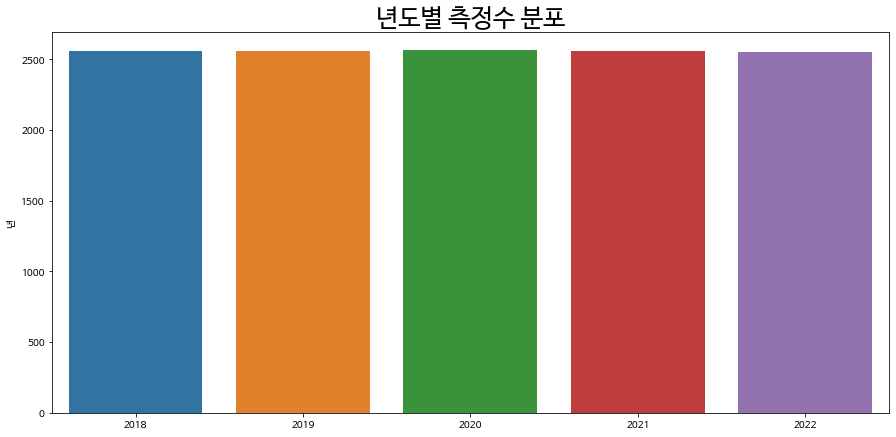

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = airport['년'].value_counts().index ,y = airport['년'].value_counts())
plt.title('년도별 측정수 분포',size=25)
plt.show()

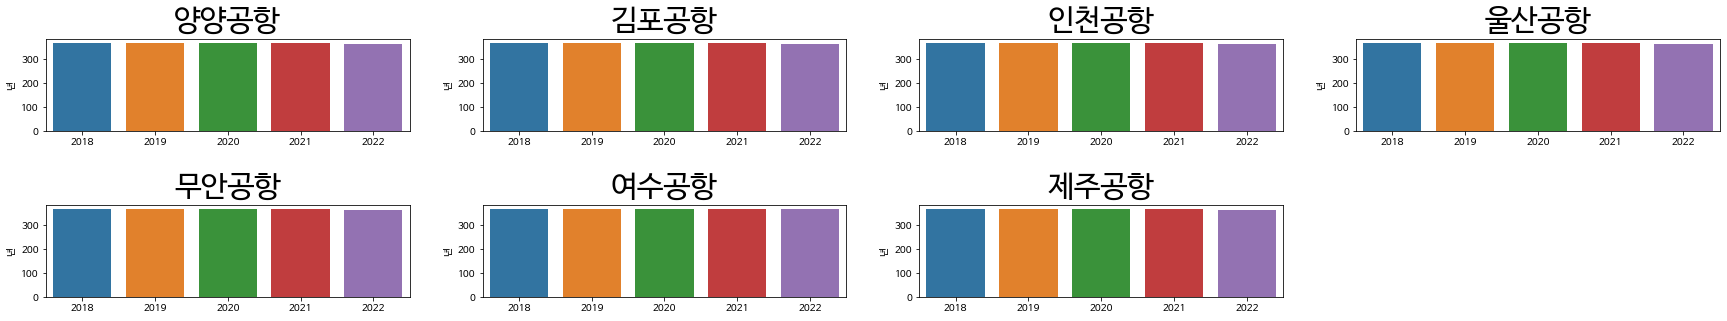

In [ ]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.8)

for p in range(len(airport['지점명'].unique())):
  plot_df = airport[airport['지점명'] == airport['지점명'].unique()[p]]

  plt.subplot(7,4,p+1)
  sns.barplot(x = plot_df['년'].value_counts().index ,y = plot_df['년'].value_counts())
  plt.title(airport['지점명'].unique()[p],size=30)
plt.show()

In [ ]:
airport.groupby('년').mean()

,평균풍속(KT),최대풍속(KT),최대순간풍속(KT),최대풍속 풍향(deg),최대순간풍속 풍향(deg),최단시정현상,최고기온(°C),최저기온(°C),평균해면기압(hPa),최고해면기압(hPa),...,30분최다강수(mm),10분최다강수(mm),최심신적설(cm),최심적설(cm),평균운량(1/8),5/8이상최저운고(FT),평균이슬점온도(°C),평균상대습도(%),월,일
년,,,,,,,,,,,,,,,,,,,,,
2018,6.90,13.80,20.53,219.60,215.61,35.98,18.29,9.51,1016.71,1019.20,...,3.84,2.10,1.88,2.97,4.03,7033.69,6.75,65.73,6.53,15.72
2019,6.75,13.76,20.64,225.36,223.05,32.95,18.79,9.80,1016.23,1018.76,...,3.61,1.97,1.88,1.88,4.23,7496.39,7.62,67.96,6.53,15.72
2020,7.05,14.02,21.24,222.63,223.98,33.24,18.40,9.79,1016.47,1019.04,...,3.87,2.19,1.63,2.07,4.25,6436.56,7.78,69.50,6.51,15.76
2021,6.90,13.92,21.09,217.25,214.41,38.49,19.05,10.02,1016.41,1018.96,...,3.23,1.85,1.98,3.28,4.18,6932.21,8.40,70.19,6.53,15.72
2022,7.07,14.03,21.61,226.76,223.04,35.53,18.68,9.57,1016.51,1018.89,...,3.62,2.05,1.62,2.08,3.99,7033.85,7.38,67.49,6.54,15.74


In [ ]:
# 년도별 분포
def year_plot(df):
  plot_df = df.groupby('년').mean()
  
  plt.figure(figsize=(30,10))
  plt.subplots_adjust(hspace=1)
    
  for idx in range(len(plot_df.columns[:-2])):
    plt.subplot(3,7,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


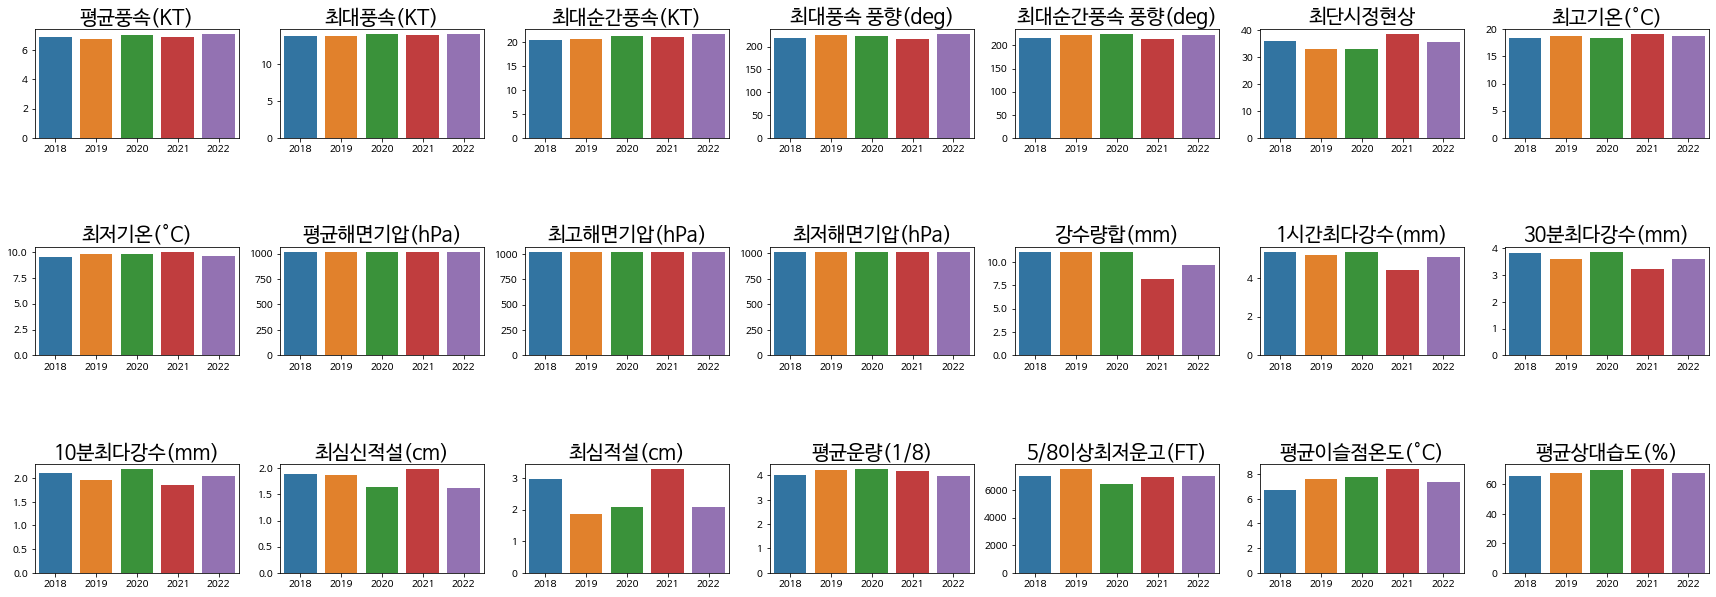

In [ ]:
year_plot(airport)

In [ ]:
# 월
def month_plot(df):
  plot_df = df.groupby('월').mean()
  
  plt.figure(figsize=(30,10))
  plt.subplots_adjust(hspace=1)
    
  for idx in range(len(plot_df.columns[:-2])):
    plt.subplot(3,7,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


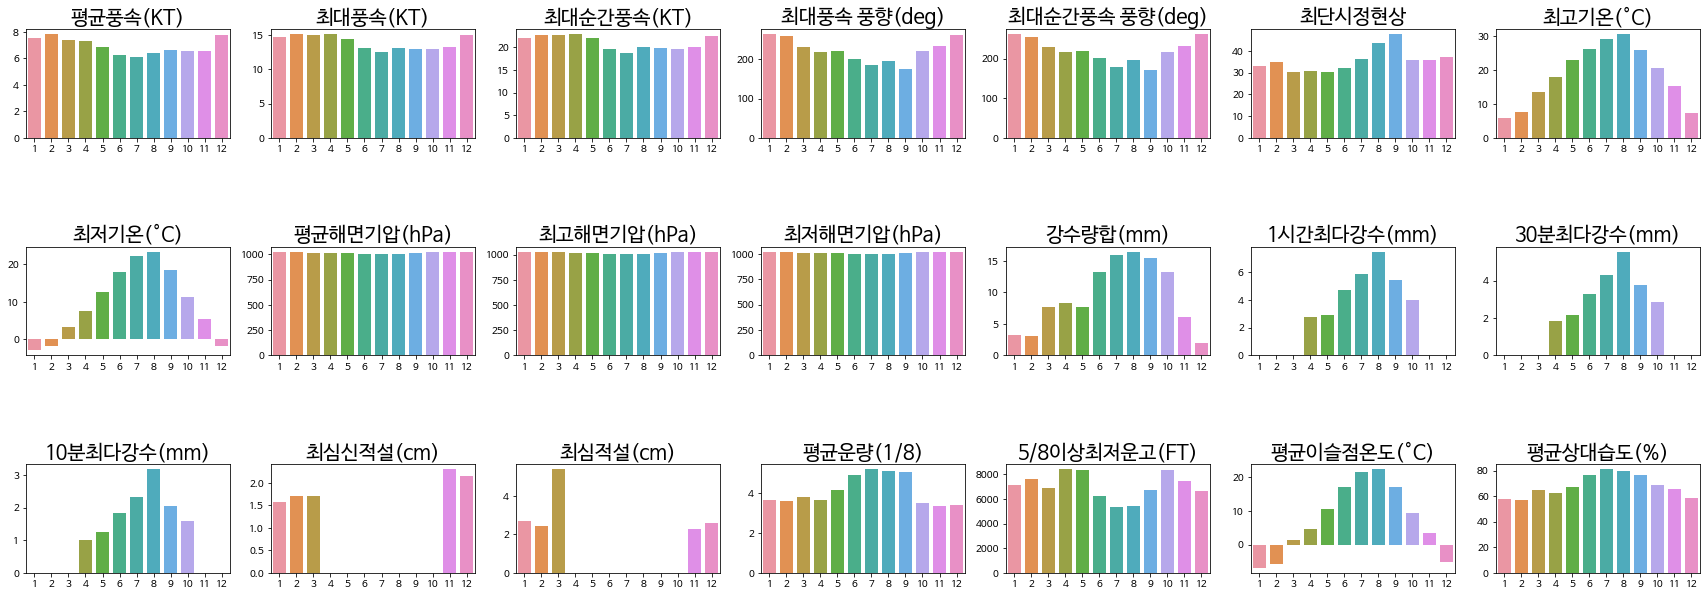

In [ ]:
month_plot(airport)

In [ ]:
airport.groupby('지점명').mean()

,평균풍속(KT),최대풍속(KT),최대순간풍속(KT),최대풍속 풍향(deg),최대순간풍속 풍향(deg),최단시정현상,최고기온(°C),최저기온(°C),평균해면기압(hPa),최고해면기압(hPa),...,10분최다강수(mm),최심신적설(cm),최심적설(cm),평균운량(1/8),5/8이상최저운고(FT),평균이슬점온도(°C),평균상대습도(%),년,월,일
지점명,,,,,,,,,,,,,,,,,,,,,
김포공항,5.44,12.24,19.49,247.32,237.91,33.11,18.30,7.28,1016.82,1019.34,...,1.88,1.27,1.41,3.78,6579.84,5.92,66.97,2020.00,6.53,15.73
무안공항,6.59,12.82,18.19,231.76,239.76,NaN,18.75,10.07,1017.01,1019.37,...,2.43,2.72,4.19,4.67,6104.03,9.92,77.44,2020.00,6.53,15.73
양양공항,7.48,14.81,21.18,237.06,227.56,NaN,17.09,9.66,1015.63,1018.32,...,1.79,5.52,6.73,3.80,7515.56,5.14,62.39,2020.00,6.53,15.73
여수공항,6.76,14.39,23.87,227.42,223.36,NaN,20.26,10.52,1016.25,1018.78,...,2.49,0.52,0.47,4.02,8979.45,8.05,65.86,2020.00,6.52,15.73
울산공항,6.83,14.02,21.82,201.25,194.20,NaN,19.90,8.61,1015.87,1018.52,...,1.84,NaN,NaN,3.91,8864.74,7.40,68.05,2020.00,6.53,15.73
인천공항,7.39,14.16,20.62,226.45,228.15,34.28,16.95,8.77,1016.91,1019.36,...,1.84,1.32,1.48,3.89,6036.45,5.92,65.54,2020.00,6.53,15.73
제주공항,8.04,14.89,21.99,184.98,189.18,39.11,19.24,13.25,1016.78,1019.10,...,2.04,1.79,3.30,4.88,5498.67,10.75,70.97,2020.00,6.53,15.73


In [ ]:
# 지점별 분포
def point_plot(df):
  plot_df = df.groupby('지점명').mean()
  
  plt.figure(figsize=(30,10))
  plt.subplots_adjust(hspace=1)
    
  for idx in range(len(plot_df.columns[:-2])):
    plt.subplot(3,8,idx+1)
    sns.barplot(x=plot_df[plot_df.columns[idx]].sort_values()[::-1].index , y=plot_df[plot_df.columns[idx]].sort_values()[::-1])
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


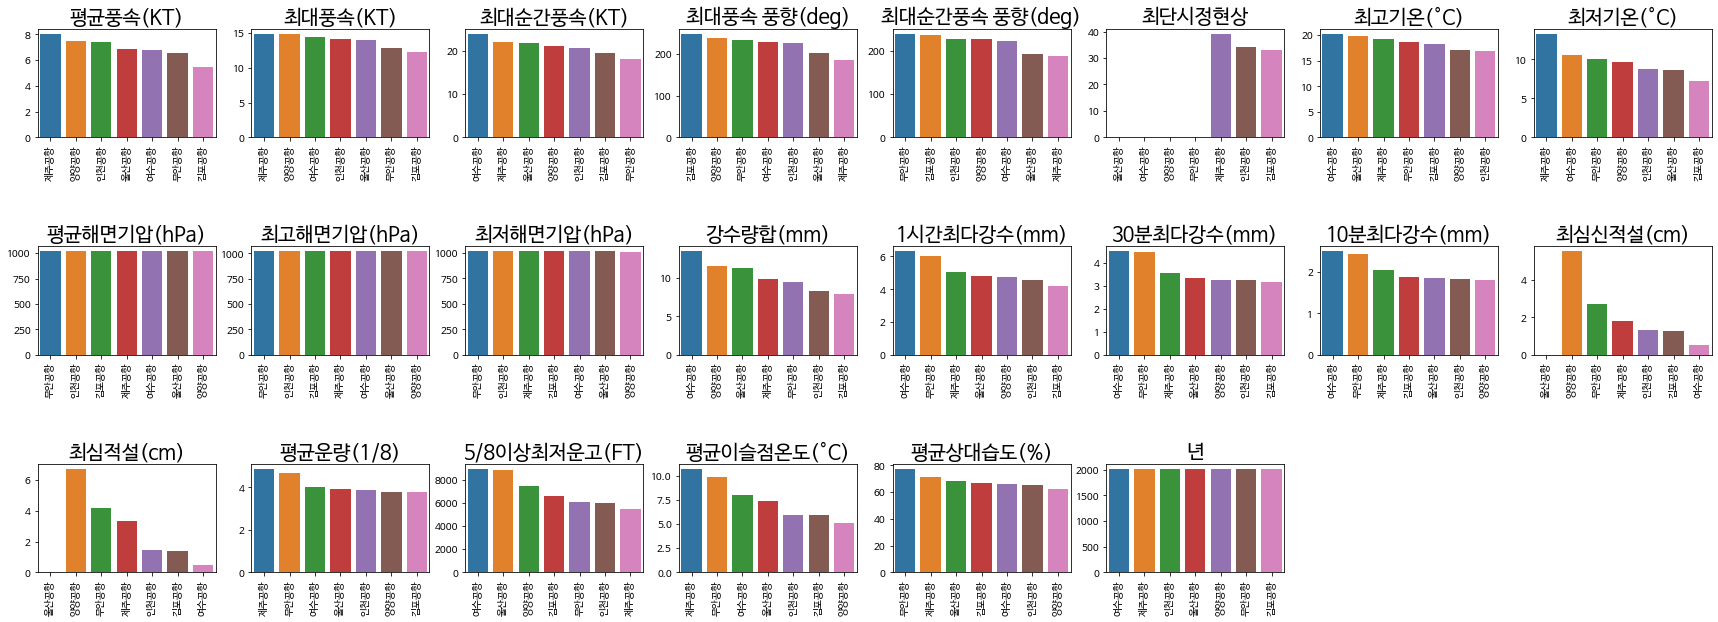

In [ ]:
point_plot(airport)

In [ ]:
# 년도별 컬럼별 분포
year_list = list(range(2018,2023))
def make_plot(df):
  for col in df.columns[2:-3]:
    if '시각' in col:
      continue
      
    plt.figure(figsize=(30,10))
    plt.subplots_adjust(hspace=0.5)

    for idx in range(len(year_list)):
      plot_df = df[df['년'] == year_list[idx]]
      plt.subplot(1,5,idx+1)
      sns.barplot(x=plot_df['월'] , y=plot_df[col])
      # sns.barplot(x = plot_df['월'] , y = plot_df.loc[:,col])
      plt.xlabel('')
      plt.ylabel('')
      plt.title(year_list[idx],size=15)
      plt.suptitle(col,size=20)
    plt.show()

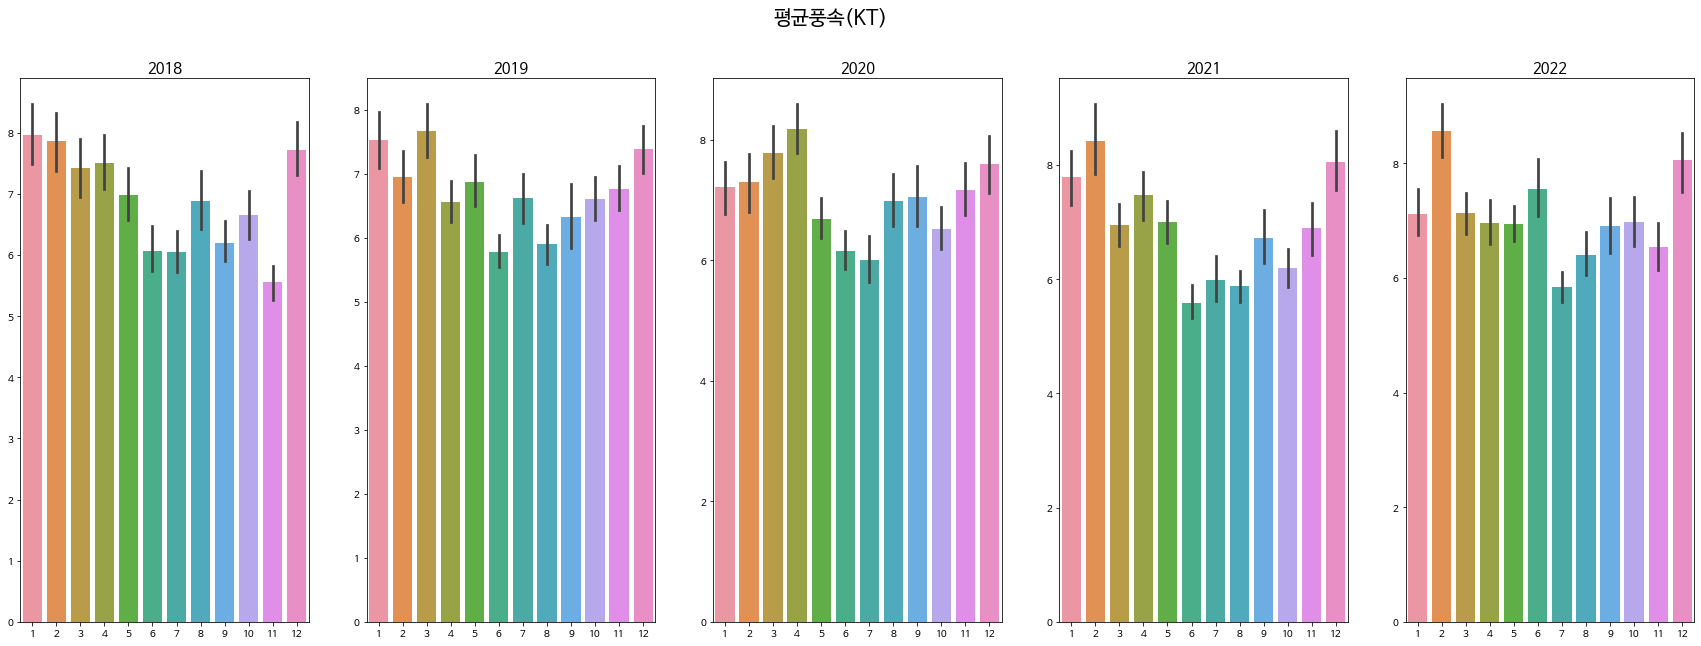

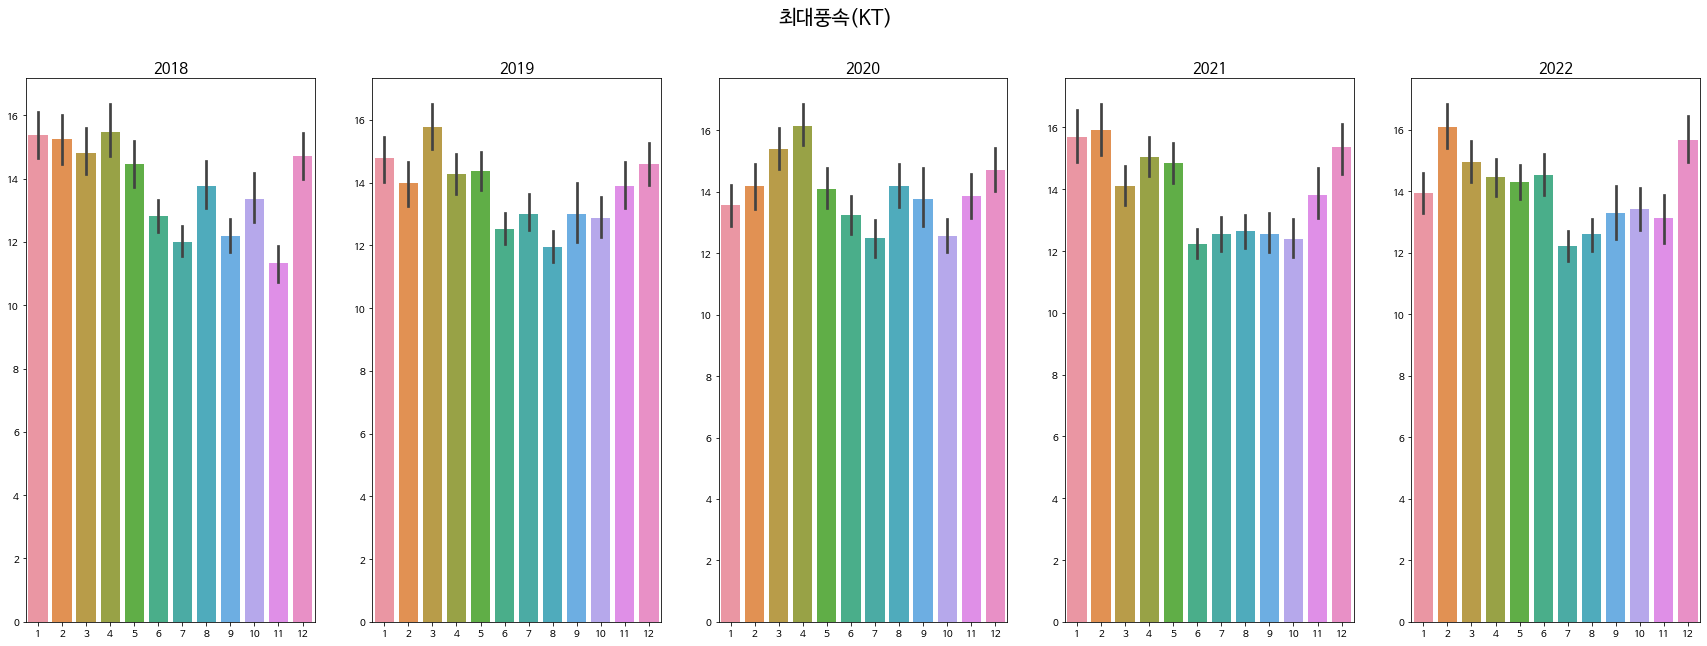

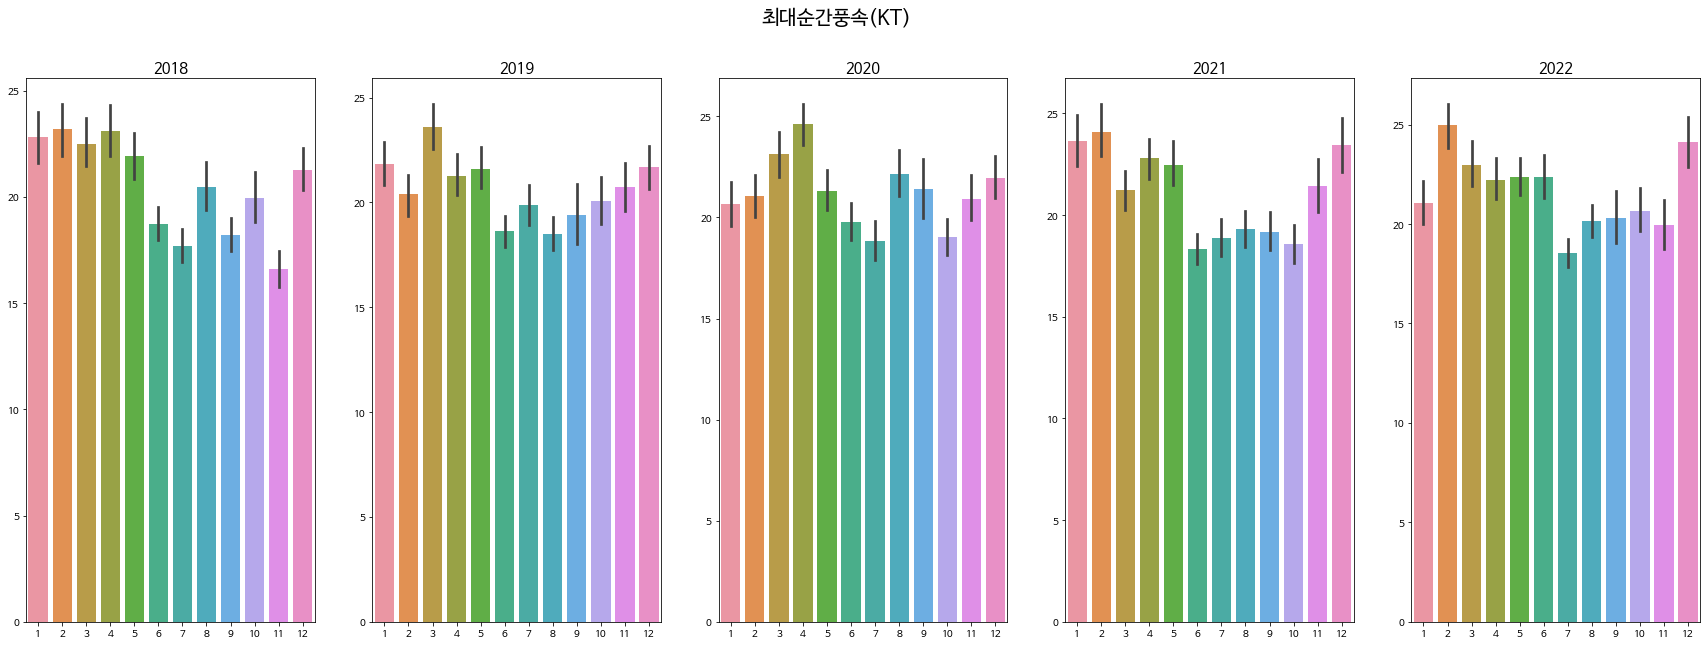

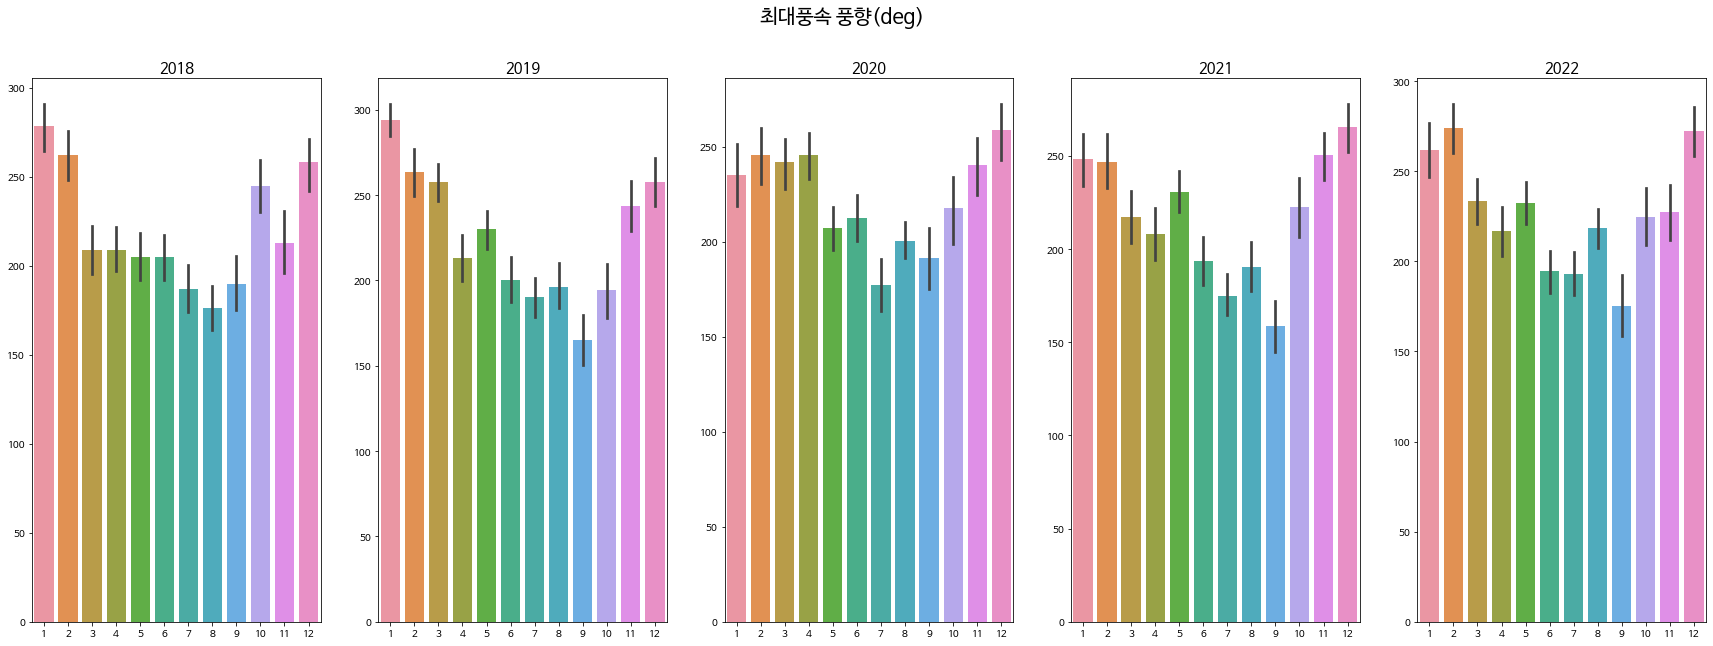

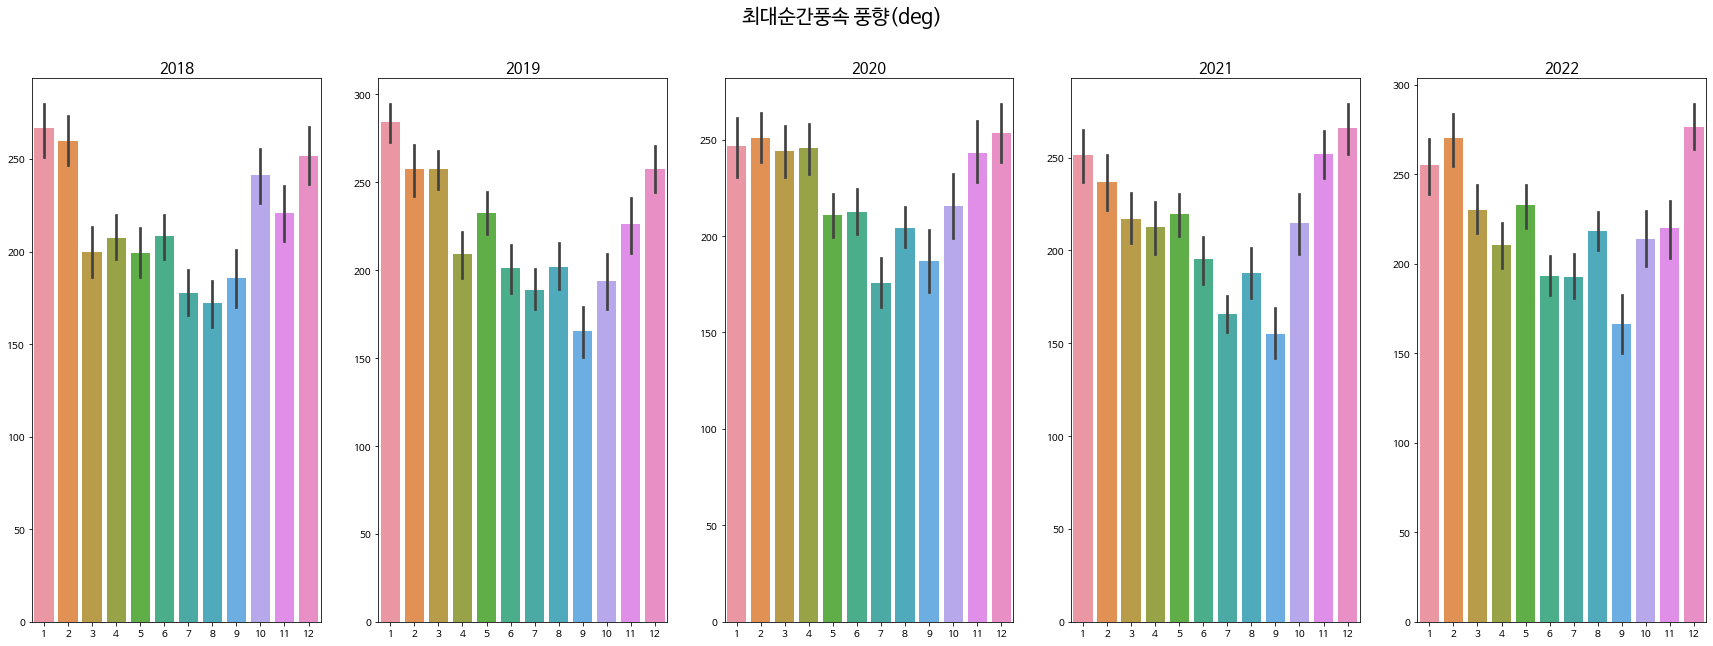

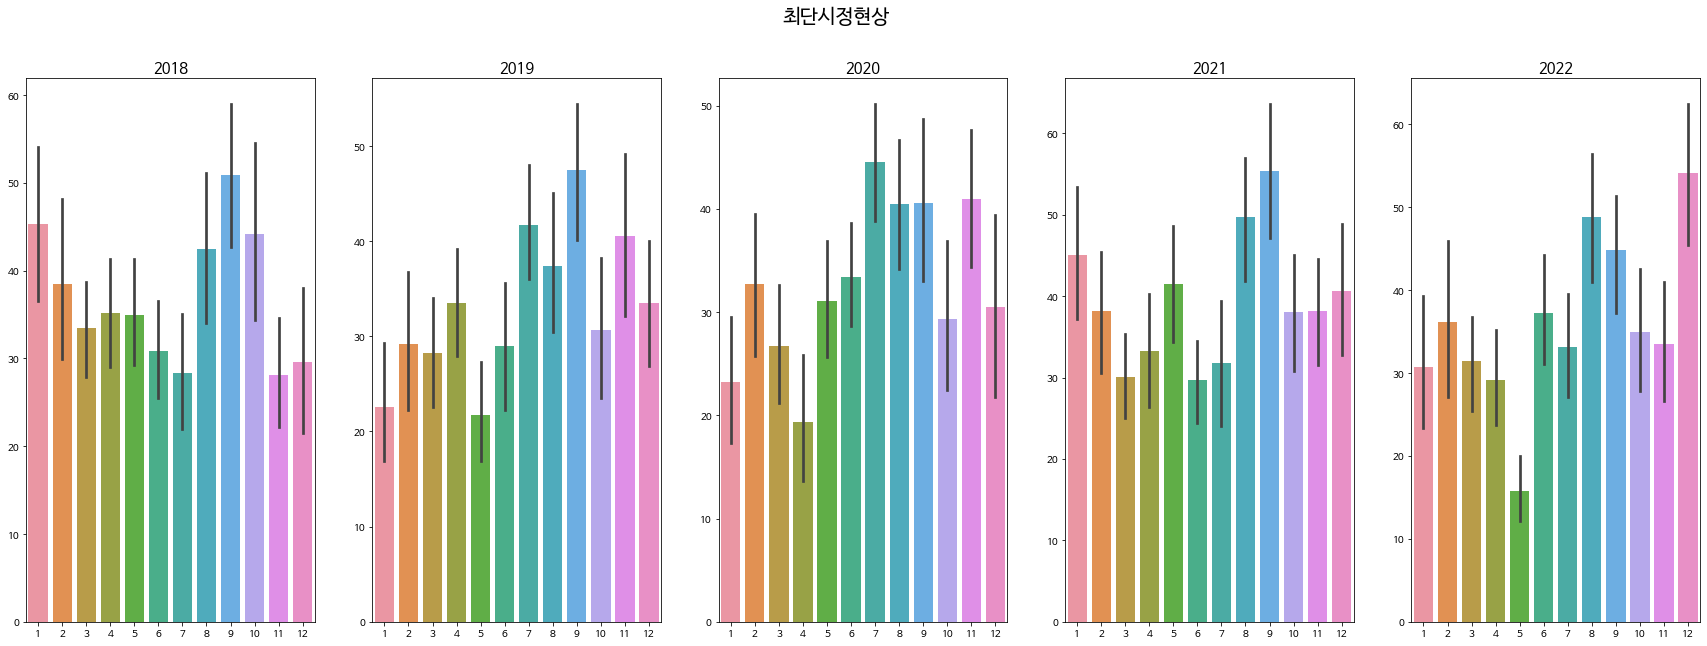

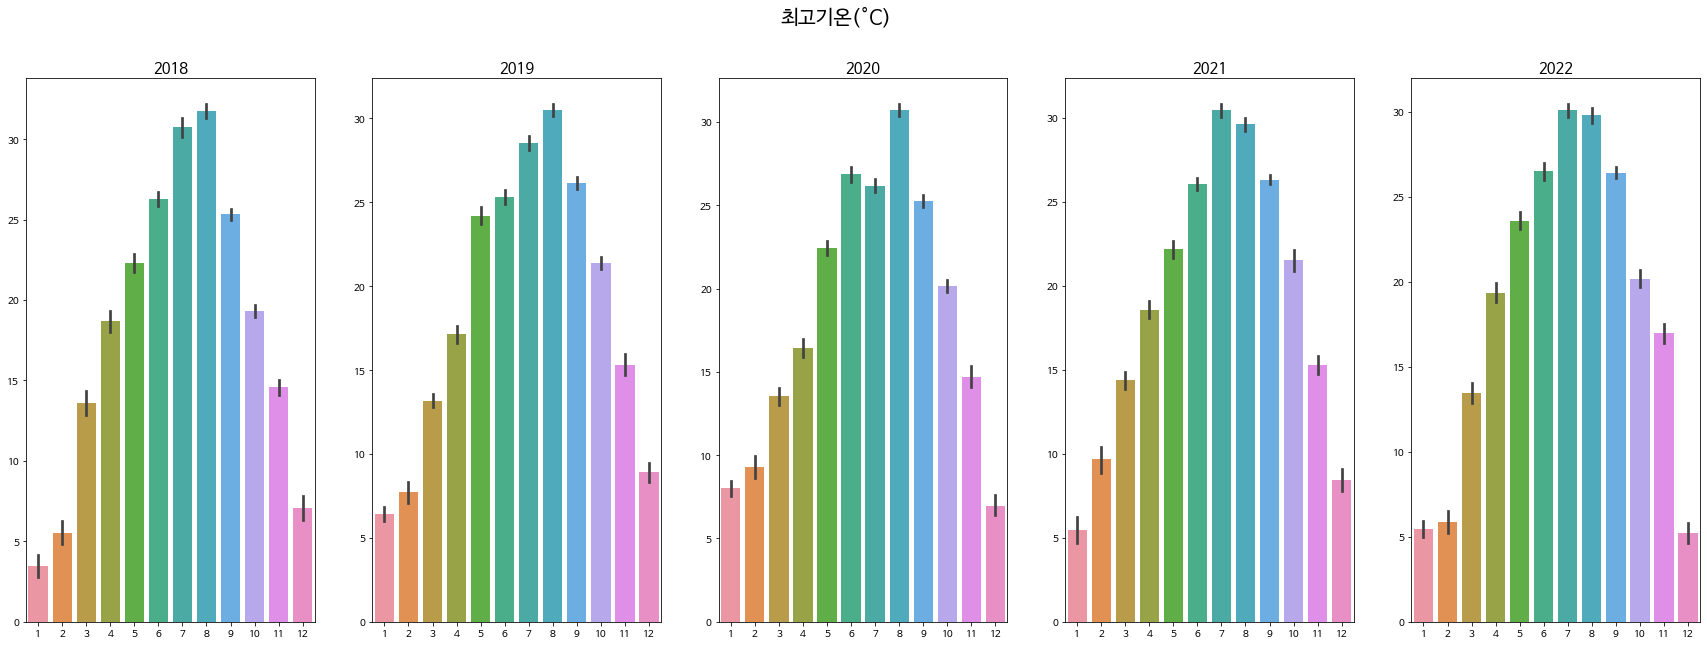

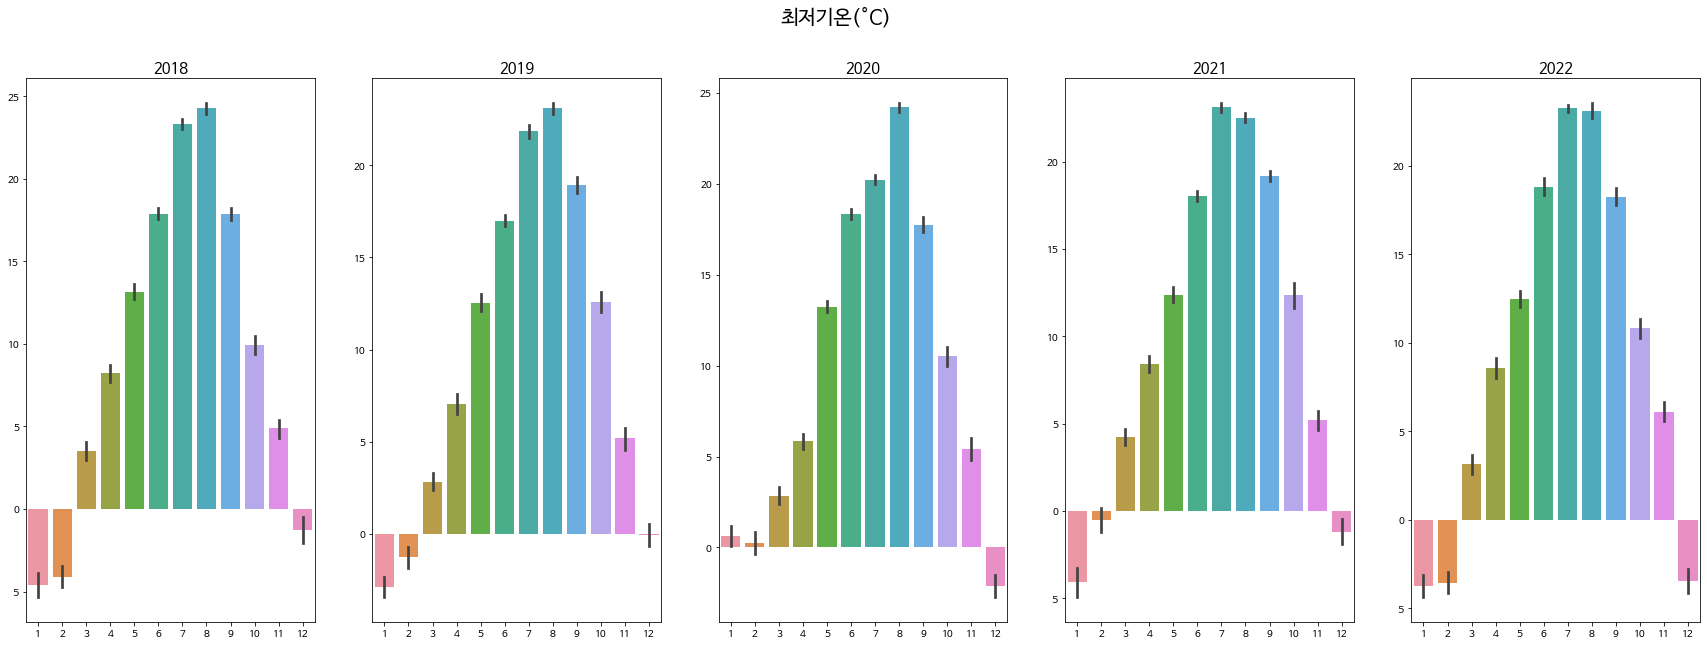

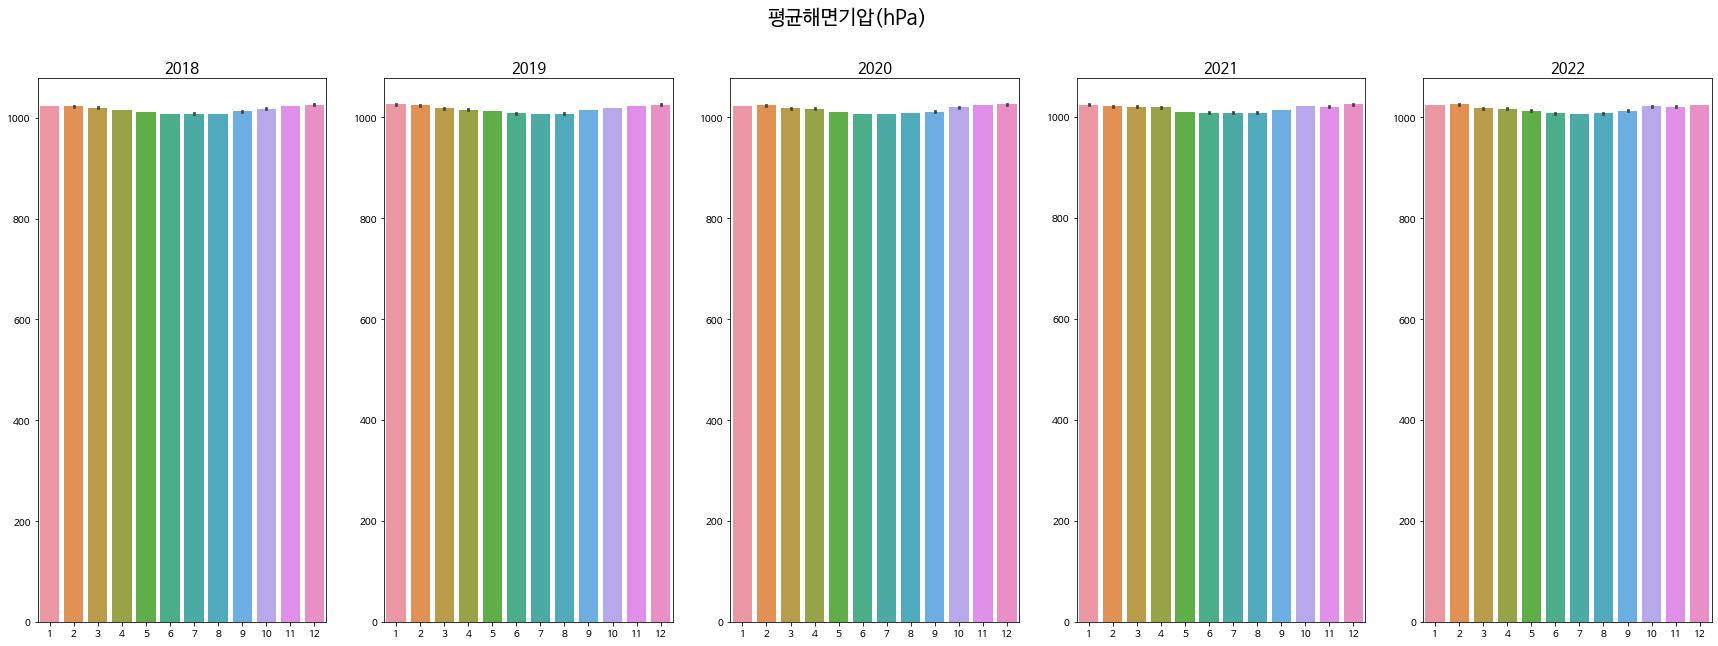

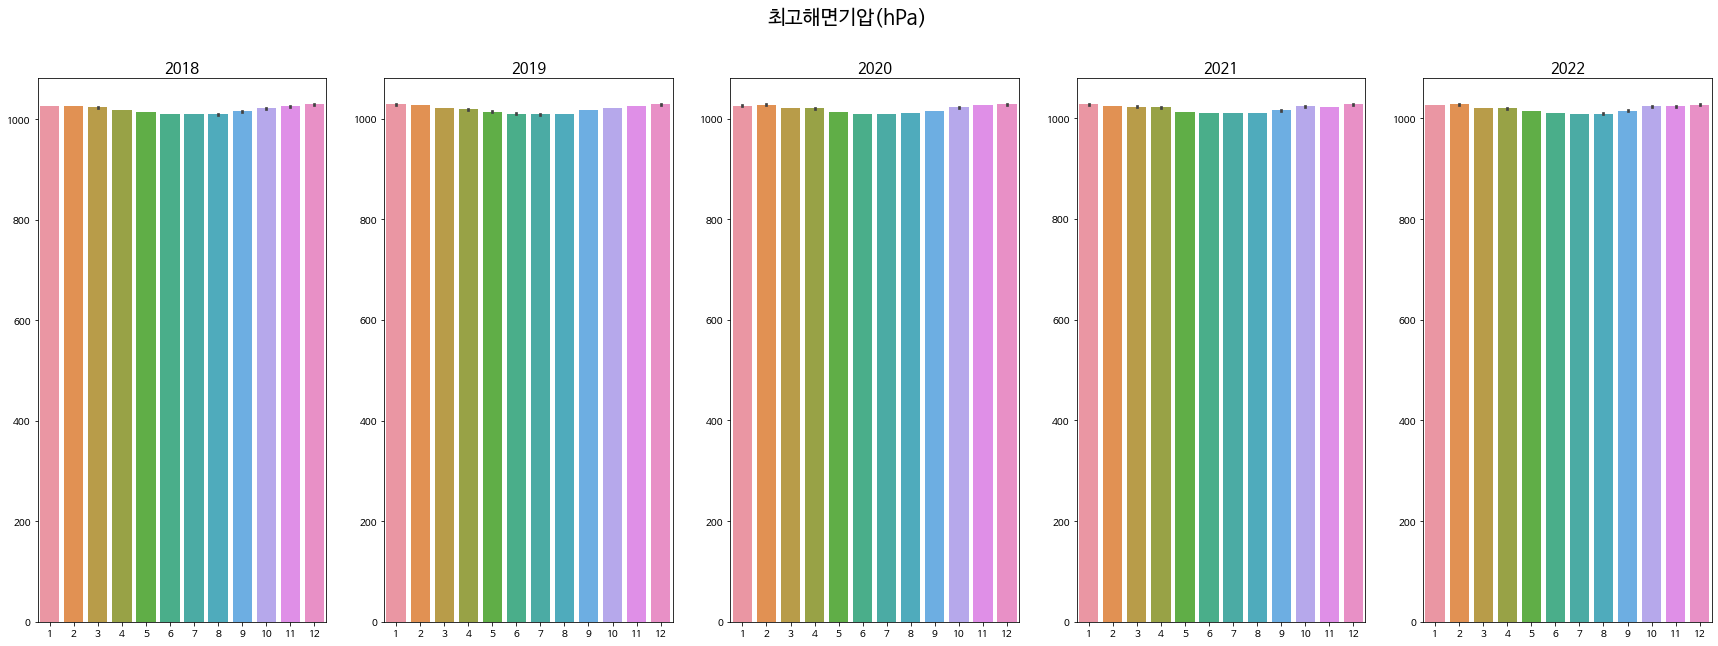

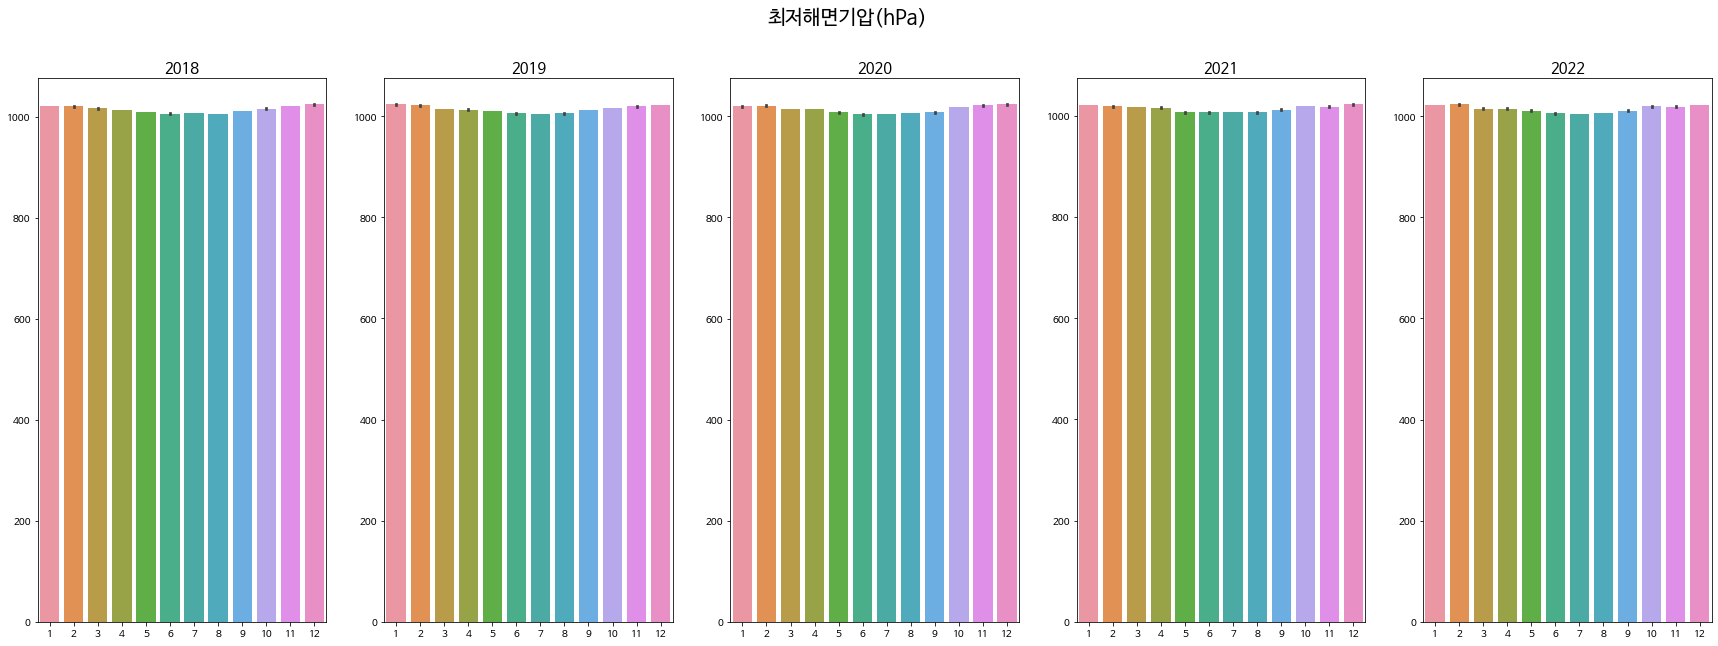

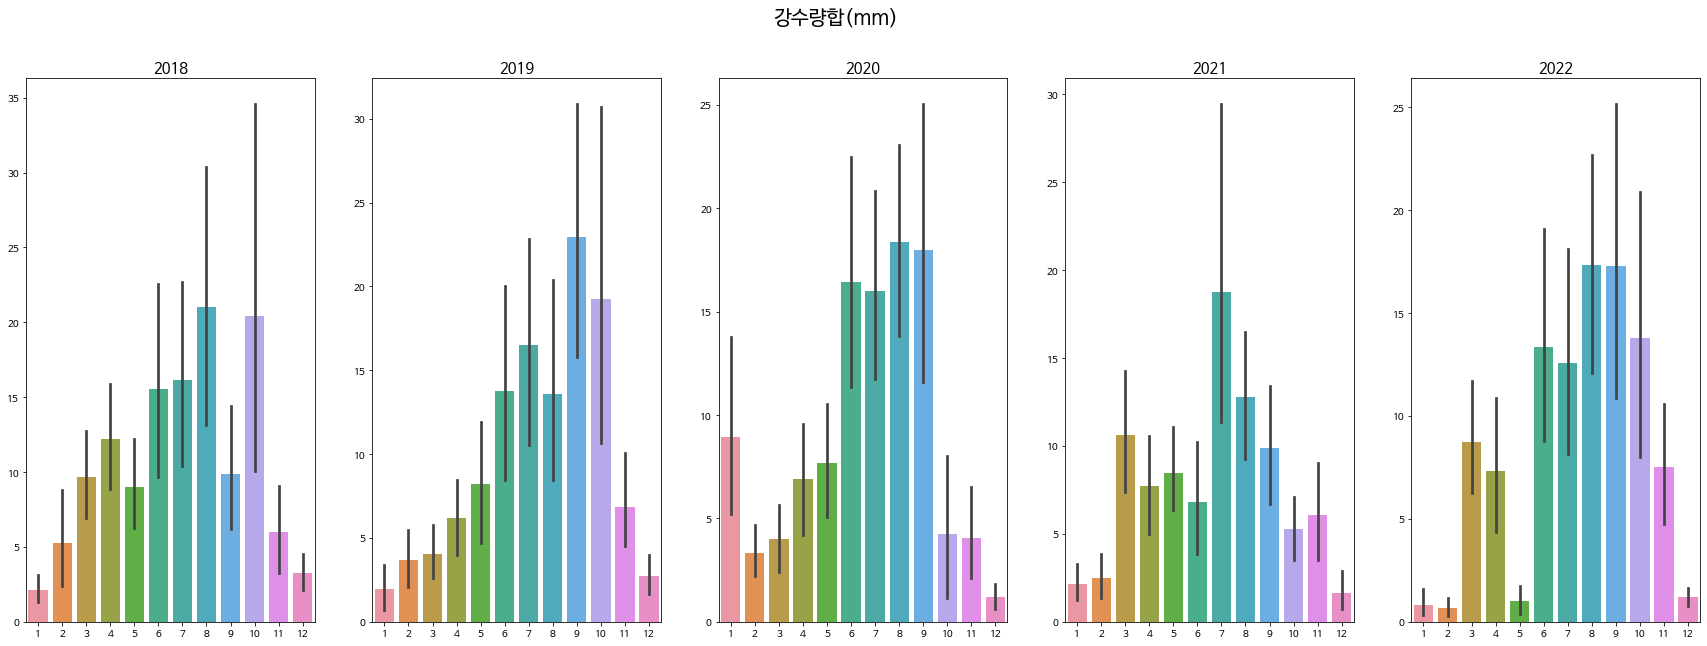

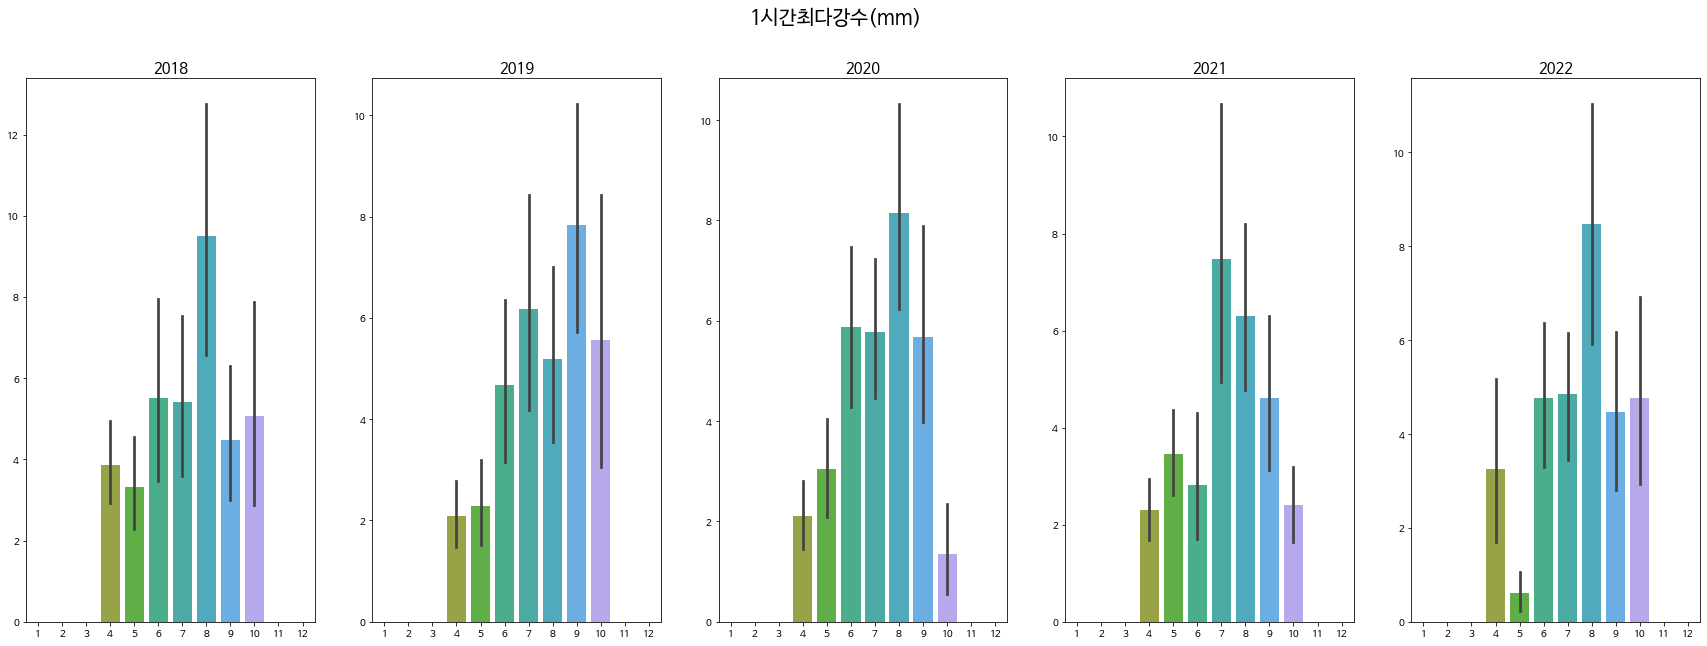

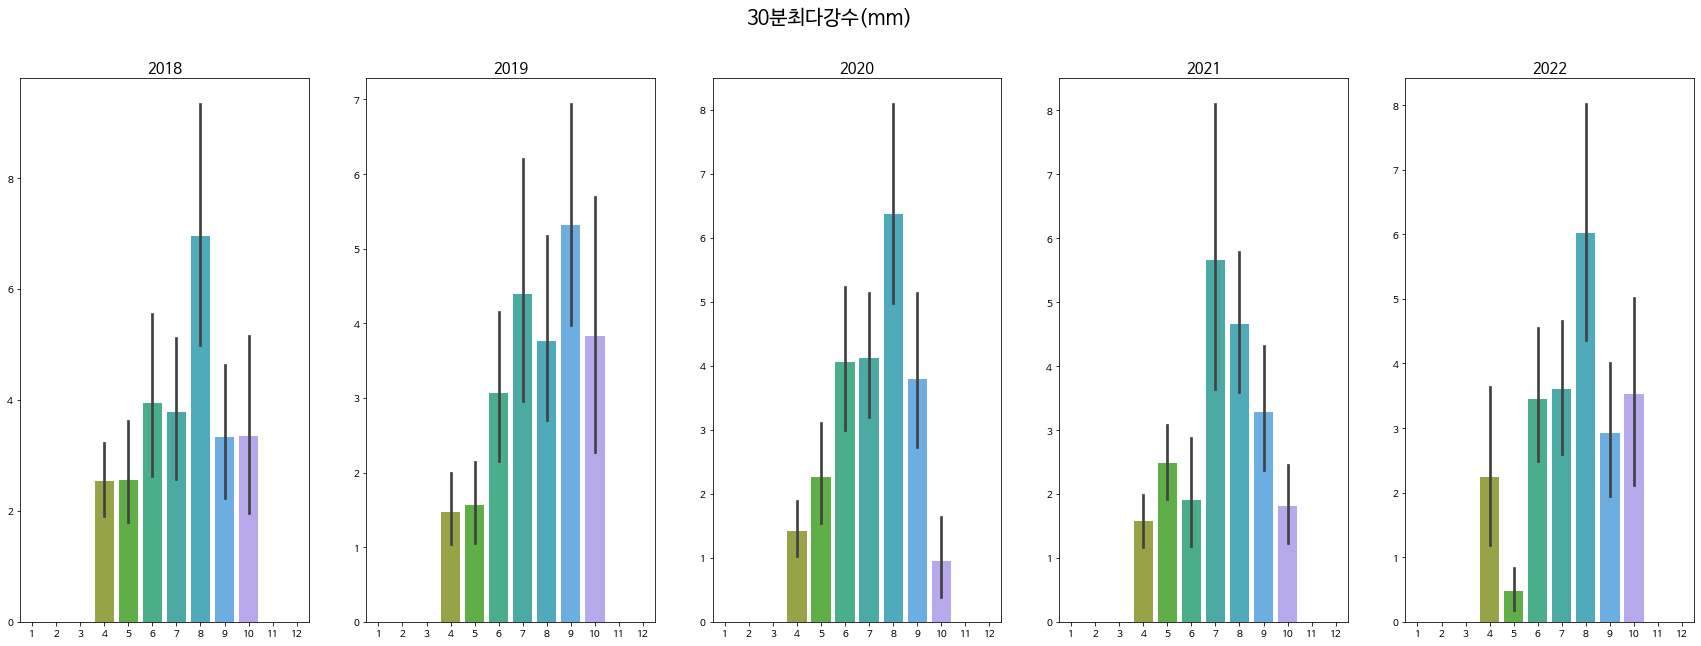

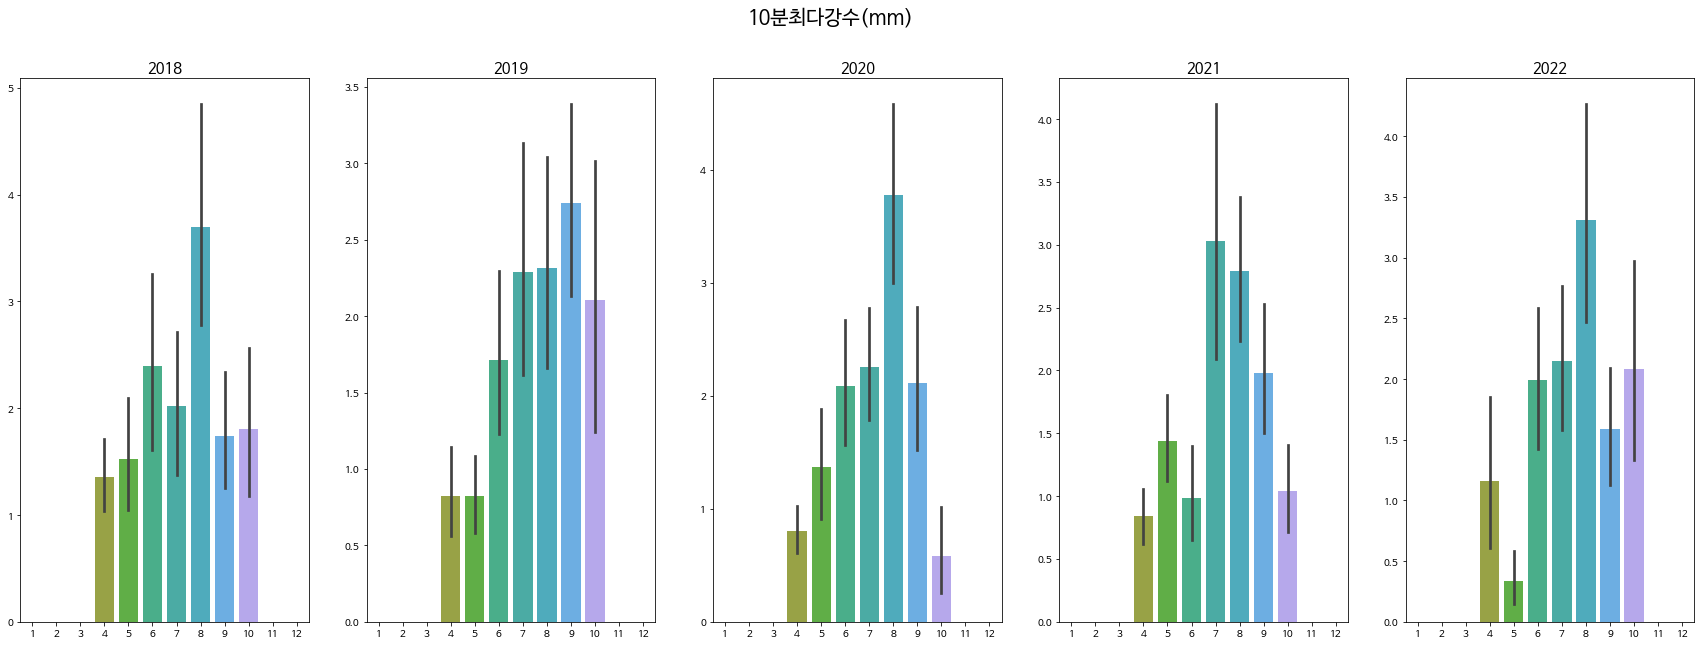

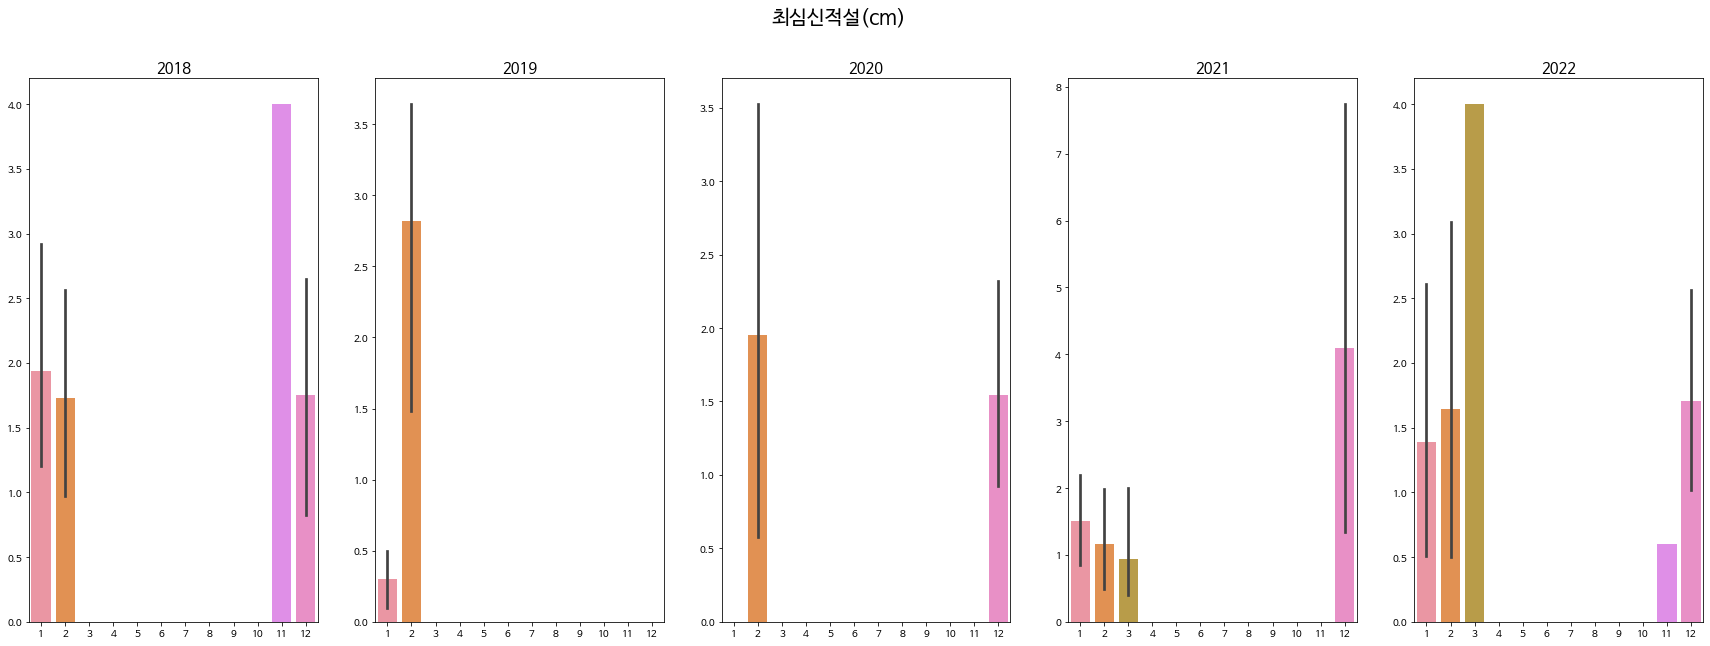

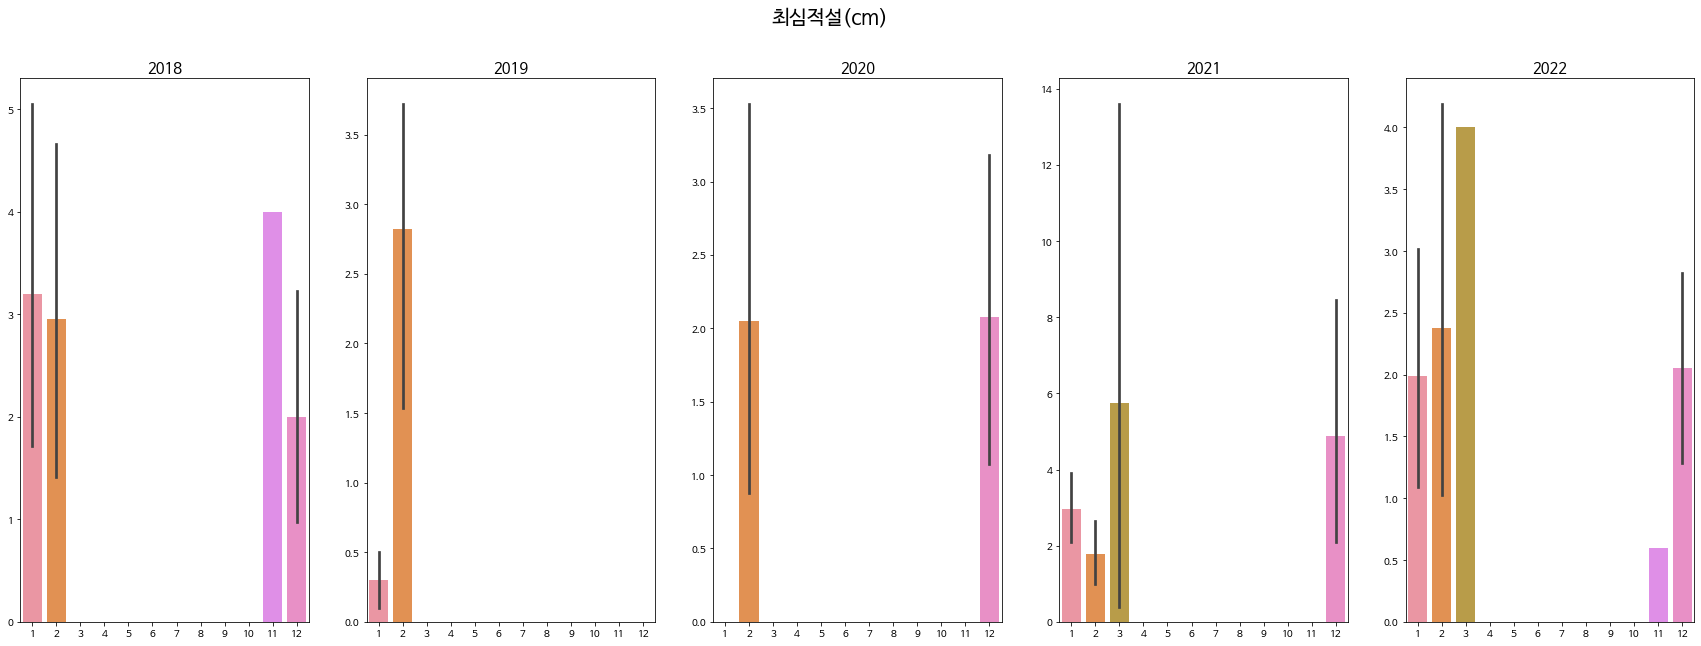

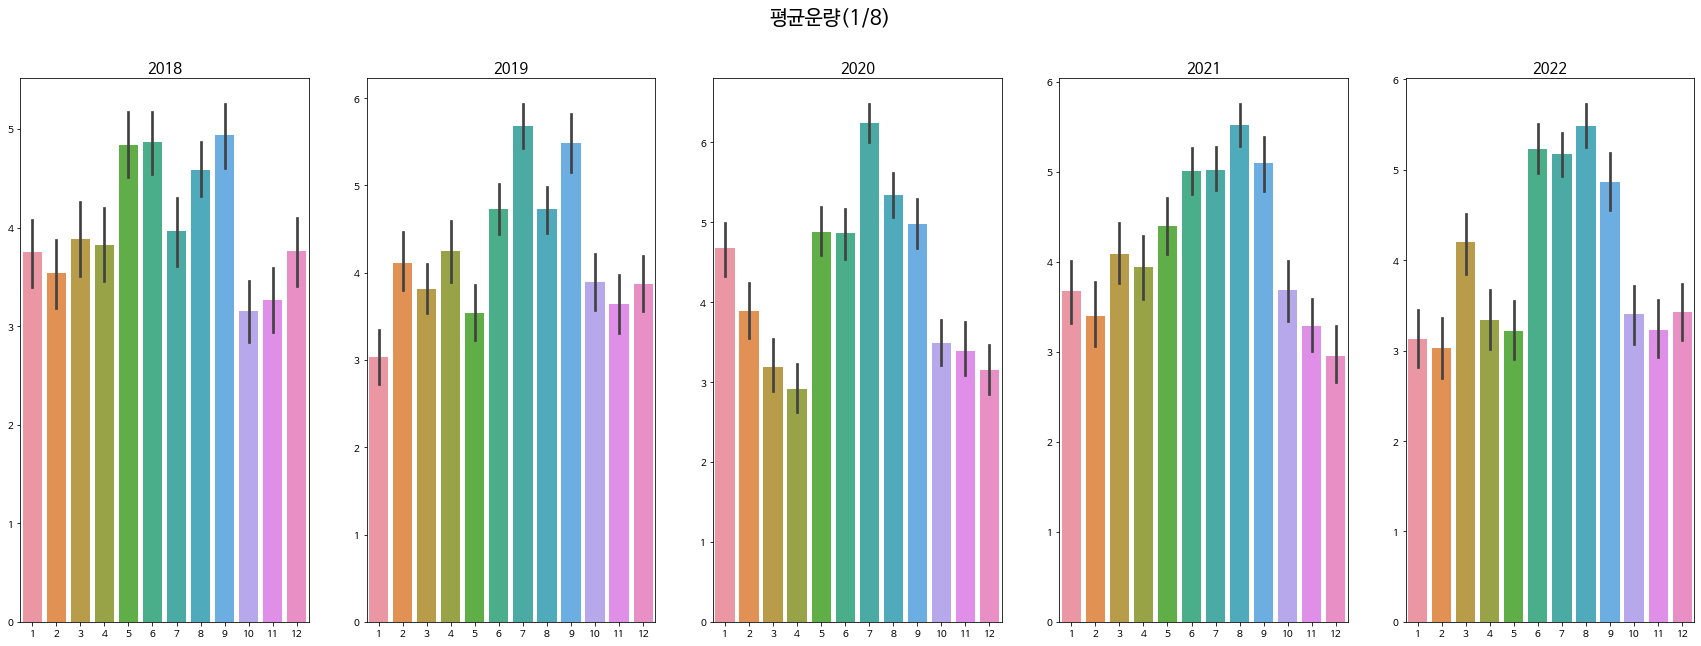

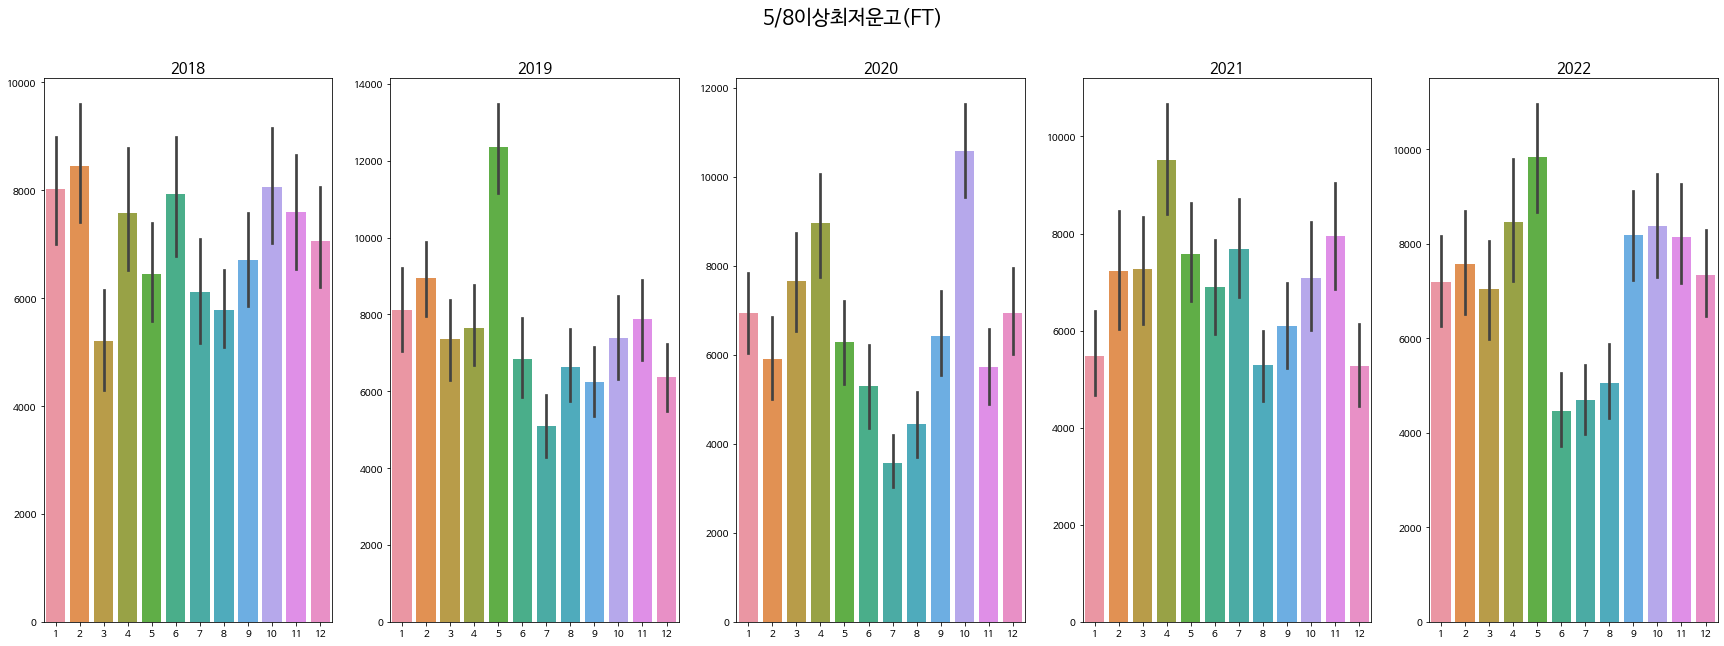

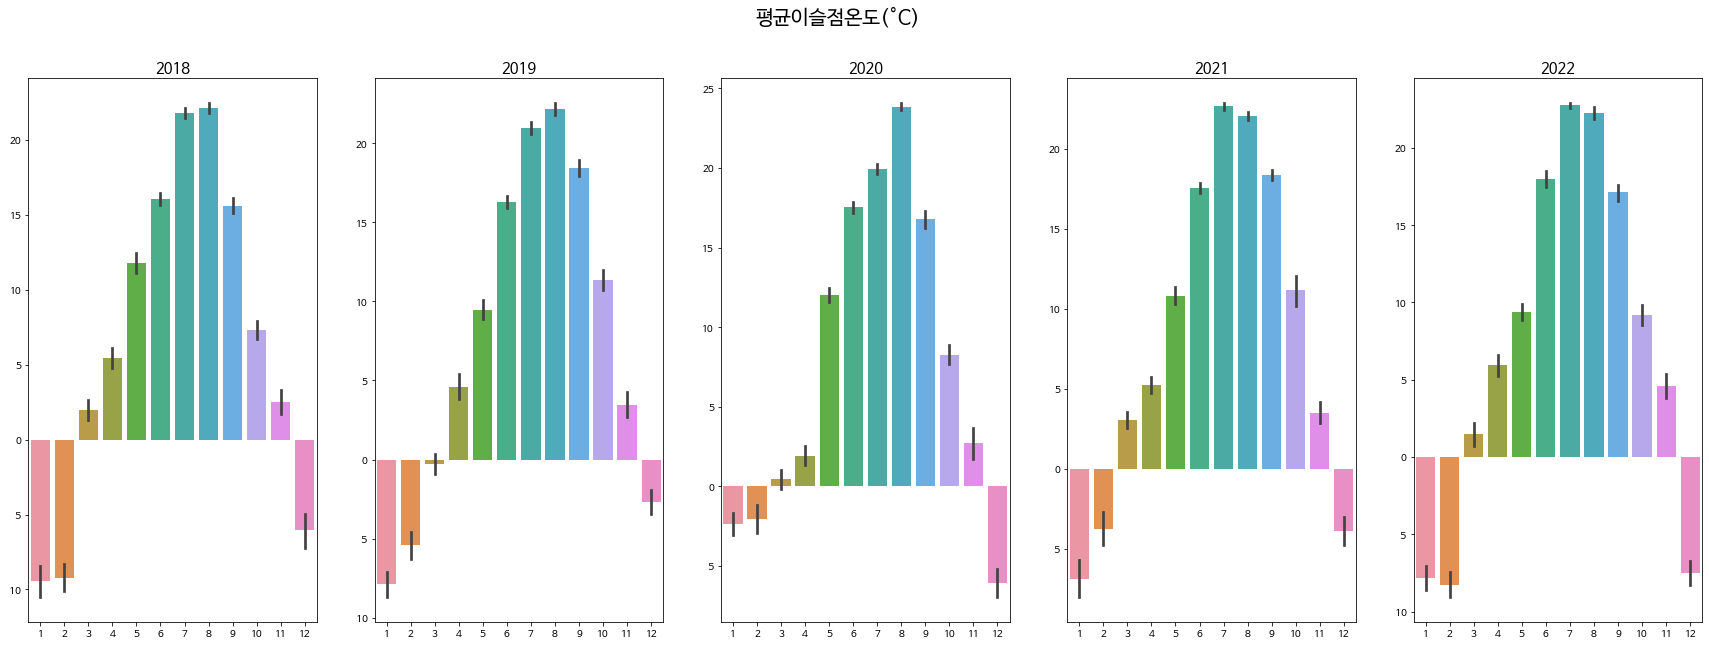

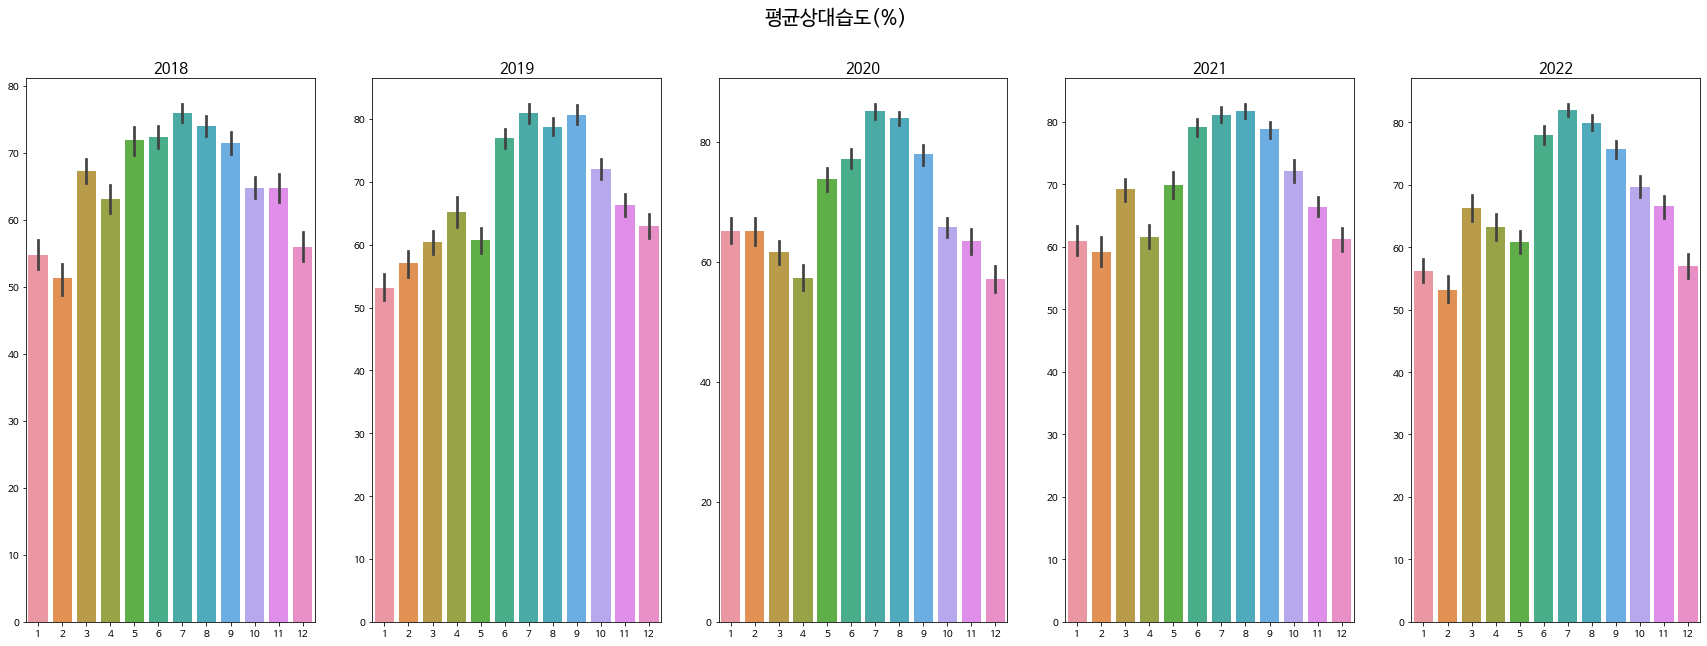

In [ ]:
make_plot(airport)

In [ ]:
def time_plot(df):
  col_list = []
  for col in df.columns:
    if '시각' in col:
      col_list.append(col)

  plt.figure(figsize = (30,10))
  plt.subplots_adjust(hspace=0.5)

  for idx in range(len(col_list)):
      plot_df = df[df[col_list[idx]].map(lambda x: datetime.strftime(x,'%Y-%m-%d %H:%M:%S')[-8:] != '00:00:00')]
      plt.subplot(2,5,idx+1)
      sns.countplot(plot_df[col_list[idx]].map(lambda x: x.hour))
      plt.title(col_list[idx])

  plt.show()

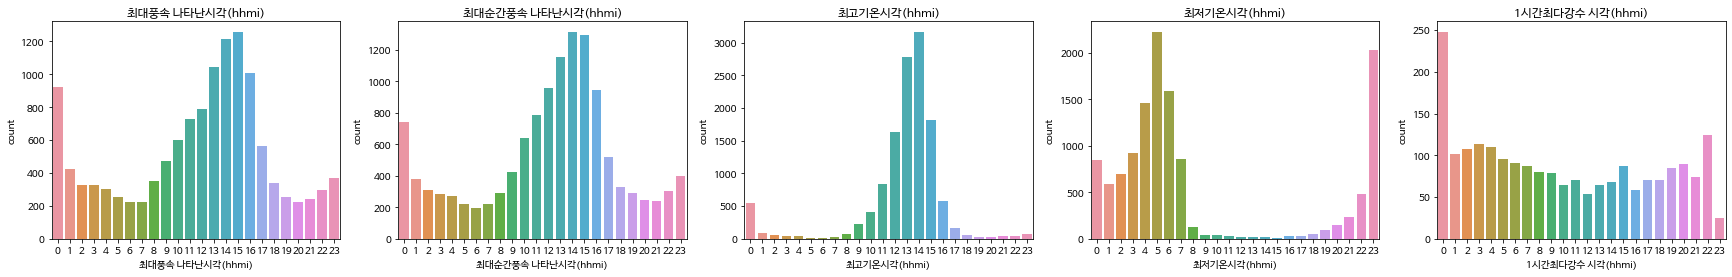

In [ ]:
time_plot(airport)

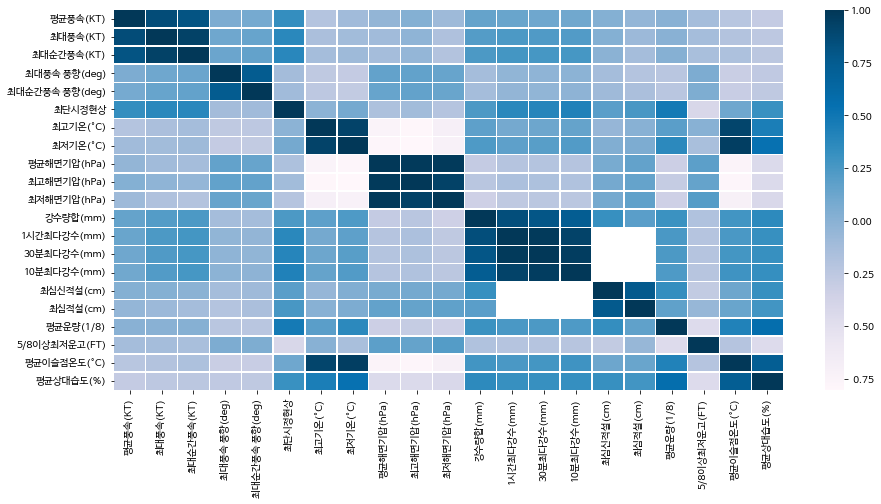

In [ ]:
corr = airport.iloc[:,2:-3].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr,
            # annot = True, 
            linewidths = 0.4, 
            linecolor = 'white', 
            fmt = '.1f', 
            cmap = plt.cm.PuBu) 

plt.show()